In [2]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
# set working directory for the data
new_directory = "../data/"
os.chdir(new_directory)
new_directory = os.getcwd()
print(f"New working directory {new_directory}")

New working directory /Users/lindalarusdottir/Arnar/Projects/CrossfitGames/data


### First lets read in the data on each competitor for each year

In [4]:
competitors = pd.read_csv("games_info_competitor_multiple_20241230_192813.csv")
competitors.head(5)

,Unnamed: 0,competitorId,competitorName,firstName,lastName,status,postCompStatus,gender,profilePicS3key,countryOfOriginCode,...,affiliateName,age,height,weight,teamCaptain,overallScore,overallRank,heightInCm,weightInKg,year
0,0,164070,James Fitzgerald,James,Fitzgerald,ACT,NaN,M,0a1aa-P164070_2-184.jpg,NaN,...,NaN,33,69 in,176 lb,0,272,1,175.3,79.8,2007
1,1,57785,Brett Marshall,Brett,Marshall,ACT,NaN,M,e11d1-P57785_2-184.jpg,NaN,...,NaN,33,168 cm,155 lb,0,270,2,168.0,70.3,2007
2,2,10091,Josh Everett,Josh,Everett,ACT,NaN,M,98160-P10091_2-184.jpg,NaN,...,NaN,32,69 in,185 lb,0,267,3,175.3,83.9,2007
3,3,27065,Chris Spealler,Chris,Spealler,ACT,NaN,M,28faf-P27065_3-184.jpg,NaN,...,NaN,28,65 in,143 lb,0,261,4,165.1,64.9,2007
4,4,7173,Breck Berry,Breck,Berry,ACT,NaN,M,f142a-P7173_6-184.jpg,NaN,...,NaN,31,67 in,170 lb,0,252,5,170.2,77.1,2007


In [5]:
# creating a friendly name division, this should be handled in the data transformation part
competitors['divisionName'] = competitors['divisionId'].apply(lambda divisionId: 'Male' if divisionId == 1 else
                                                                ('Female' if divisionId == 2 else None))

In [6]:
# We have currently have competitors from year 2007 to 2024
competitors['year'].unique()

array([2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
       2018, 2019, 2020, 2021, 2022, 2023, 2024])

In [7]:
competitors[competitors['overallRank'] == 0]

,Unnamed: 0,competitorId,competitorName,firstName,lastName,status,postCompStatus,gender,profilePicS3key,countryOfOriginCode,...,age,height,weight,teamCaptain,overallScore,overallRank,heightInCm,weightInKg,year,divisionName
688,688,151906,Mikko Salo,Mikko,Salo,ACT,NaN,M,men-square.jpg,NaN,...,33,175 cm,85 kg,0,0,0,175.0,85.0,2013,Male
818,818,14354,Rory Long-Zambard,Rory,Long-Zambard,ACT,NaN,F,c8e95-P14354_11-184.jpg,NaN,...,23,70 in,165 lb,0,0,0,177.8,74.8,2014,Female
898,898,3200,Dani Horan,Dani,Horan,ACT,NaN,F,baee0-P3200_12-184.jpg,US,...,27,66 in,150 lb,0,0,0,167.6,68.0,2015,Female
1097,1097,975774,Roman Khrennikov,Roman,Khrennikov,ACT,NaN,M,a2263-P975774_2-184.jpg,RU,...,23,182 cm,103 kg,0,0,0,182.0,103.0,2018,Male
1511,1511,901702,Stas Solodov,Stas,Solodov,ACT,NaN,M,e46ea-P901702_3-184.jpg,RU,...,36,175 cm,85 kg,0,0,0,175.0,85.0,2021,Male
1512,1512,975774,Roman Khrennikov,Roman,Khrennikov,ACT,NaN,M,a2263-P975774_2-184.jpg,RU,...,26,182 cm,103 kg,0,0,0,182.0,103.0,2021,Male
1550,1550,455677,Larissa Cunha,Larissa,Cunha,ACT,NaN,F,d65e1-P455677_3-184.jpg,BR,...,30,153 cm,62 kg,0,0,0,153.0,62.0,2021,Female
1551,1551,592472,Bethany Shadburne,Bethany,Shadburne,ACT,NaN,F,69340-P592472_6-184.jpg,US,...,27,64 in,144 lb,0,0,0,162.6,65.3,2021,Female
1552,1552,1019212,Svetlana Kubyshkina,Svetlana,Kubyshkina,ACT,NaN,F,c584b-P1019212_1-184.jpg,RU,...,30,155 cm,60 kg,0,0,0,155.0,60.0,2021,Female
1672,1672,120333,Jason Smith,Jason,Smith,ACT,NaN,M,19ca5-P120333_5-184.jpg,ZA,...,39,185 cm,195 lb,0,0,0,185.0,88.5,2023,Male


### Next let's read event data for every Games we have

In [8]:
events = pd.read_csv("games_info_scores_multiple_20241230_104542.csv")
events.head(5)

,Unnamed: 0,ordinal,rank,score,valid,scoreDisplay,scoreIdentifier,mobileScoreDisplay,scaled,video,heat,lane,breakdown,competitorId,year,division,rankReason,scoreIsWeightInKg
0,0,1,2.0,95,1.0,13:39,75881c2cd249b98185a8,NaN,0,0,NaN,NaN,95 pts,164070,2007,1,NaN,NaN
1,1,2,2.0,95,1.0,20:45,bf9d6716056044146079,NaN,0,0,NaN,NaN,95 pts,164070,2007,1,NaN,NaN
2,2,3,11.0,82,1.0,906.4 lb,a355dcd3303b9b861ba0,NaN,0,0,NaN,NaN,82 pts,164070,2007,1,NaN,411.0
3,3,1,1.0,100,1.0,13:07,ed155ea36b3781f16914,NaN,0,0,NaN,NaN,100 pts,57785,2007,1,NaN,NaN
4,4,2,3.0,90,1.0,22:00,b25717e51efa6f0d783d,NaN,0,0,NaN,NaN,90 pts,57785,2007,1,NaN,NaN


In [9]:
# We have currently have events from year 2007 to 2024
events['year'].unique()

array([2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
       2018, 2019, 2020, 2021, 2022, 2023, 2024])

# Exploratory Data Analysis

Let's explore all the Games and then deep dibe into the 2019 Crossfit Games with some plots!


In [10]:
# Count competitors per year
total_competitors = competitors.groupby('year')['competitorName'].count().reset_index(name='total_competitors')

# Count competitors per year per division
division_competitors = competitors.groupby(['year', 'divisionName'])['competitorName'].count().reset_index(name='competitors')

/var/folders/0k/4mdm0lzx0lsd1b3mfrjzrbph0000gn/T/ipykernel_25403/805124365.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='year', y='total_competitors', data=total_competitors, palette='viridis')


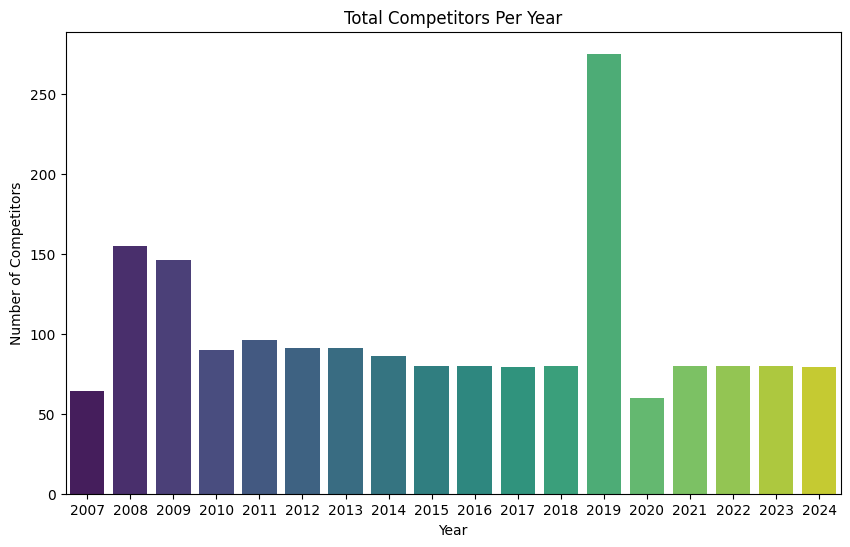

In [11]:
# Plot total competitors per year
plt.figure(figsize=(10, 6))
sns.barplot(x='year', y='total_competitors', data=total_competitors, palette='viridis')
plt.title('Total Competitors Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Competitors')
plt.show()

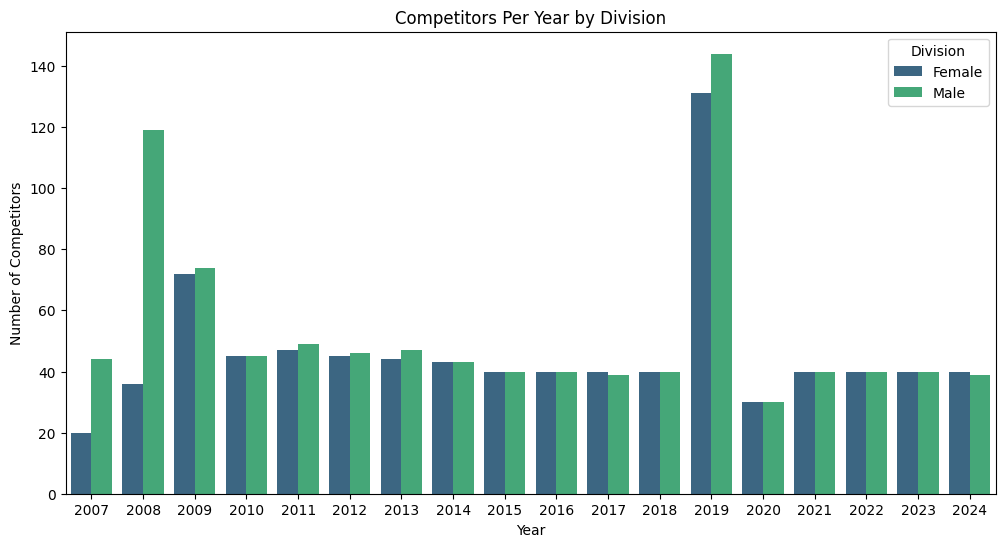

In [12]:
# Plot competitors per year in each division
plt.figure(figsize=(12, 6))
sns.barplot(x='year', y='competitors', hue='divisionName', data=division_competitors, palette='viridis')
plt.title('Competitors Per Year by Division')
plt.xlabel('Year')
plt.ylabel('Number of Competitors')
plt.legend(title='Division')
plt.show()

### Let's slice the competitors and events dataframes so that we are only working with the year 2019

In [13]:
competitors_2019 = competitors[competitors['year'] == 2019]
competitors_2019.info()

<class 'pandas.core.frame.DataFrame'>
Index: 275 entries, 1138 to 1412
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           275 non-null    int64  
 1   competitorId         275 non-null    int64  
 2   competitorName       275 non-null    object 
 3   firstName            275 non-null    object 
 4   lastName             275 non-null    object 
 5   status               275 non-null    object 
 6   postCompStatus       0 non-null      float64
 7   gender               275 non-null    object 
 8   profilePicS3key      275 non-null    object 
 9   countryOfOriginCode  274 non-null    object 
 10  countryOfOriginName  271 non-null    object 
 11  countryShortCode     0 non-null      float64
 12  regionId             0 non-null      float64
 13  regionName           0 non-null      object 
 14  divisionId           275 non-null    int64  
 15  affiliateId          241 non-null    floa

In [14]:
events_2019 = events[events['year'] == 2019]
events_2019.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3300 entries, 11712 to 15011
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          3300 non-null   int64  
 1   ordinal             3300 non-null   int64  
 2   rank                3300 non-null   float64
 3   score               3300 non-null   int64  
 4   valid               699 non-null    float64
 5   scoreDisplay        824 non-null    object 
 6   scoreIdentifier     3300 non-null   object 
 7   mobileScoreDisplay  0 non-null      float64
 8   scaled              3300 non-null   int64  
 9   video               3300 non-null   int64  
 10  heat                0 non-null      float64
 11  lane                0 non-null      float64
 12  breakdown           701 non-null    object 
 13  competitorId        3300 non-null   int64  
 14  year                3300 non-null   int64  
 15  division            3300 non-null   int64  
 16  rankRe

In [15]:
# joining the dataframes together to get competitor info into the events data
merged_2019 = pd.merge(events_2019,competitors_2019, how="inner", on="competitorId")
merged_2019['countryOfOriginCode'] = merged_2019['countryOfOriginCode'].fillna('Unknown')
merged_2019['countryOfOriginName'] = merged_2019['countryOfOriginName'].fillna('Unknown')

### What country had the best average ranking at the Games 2019?


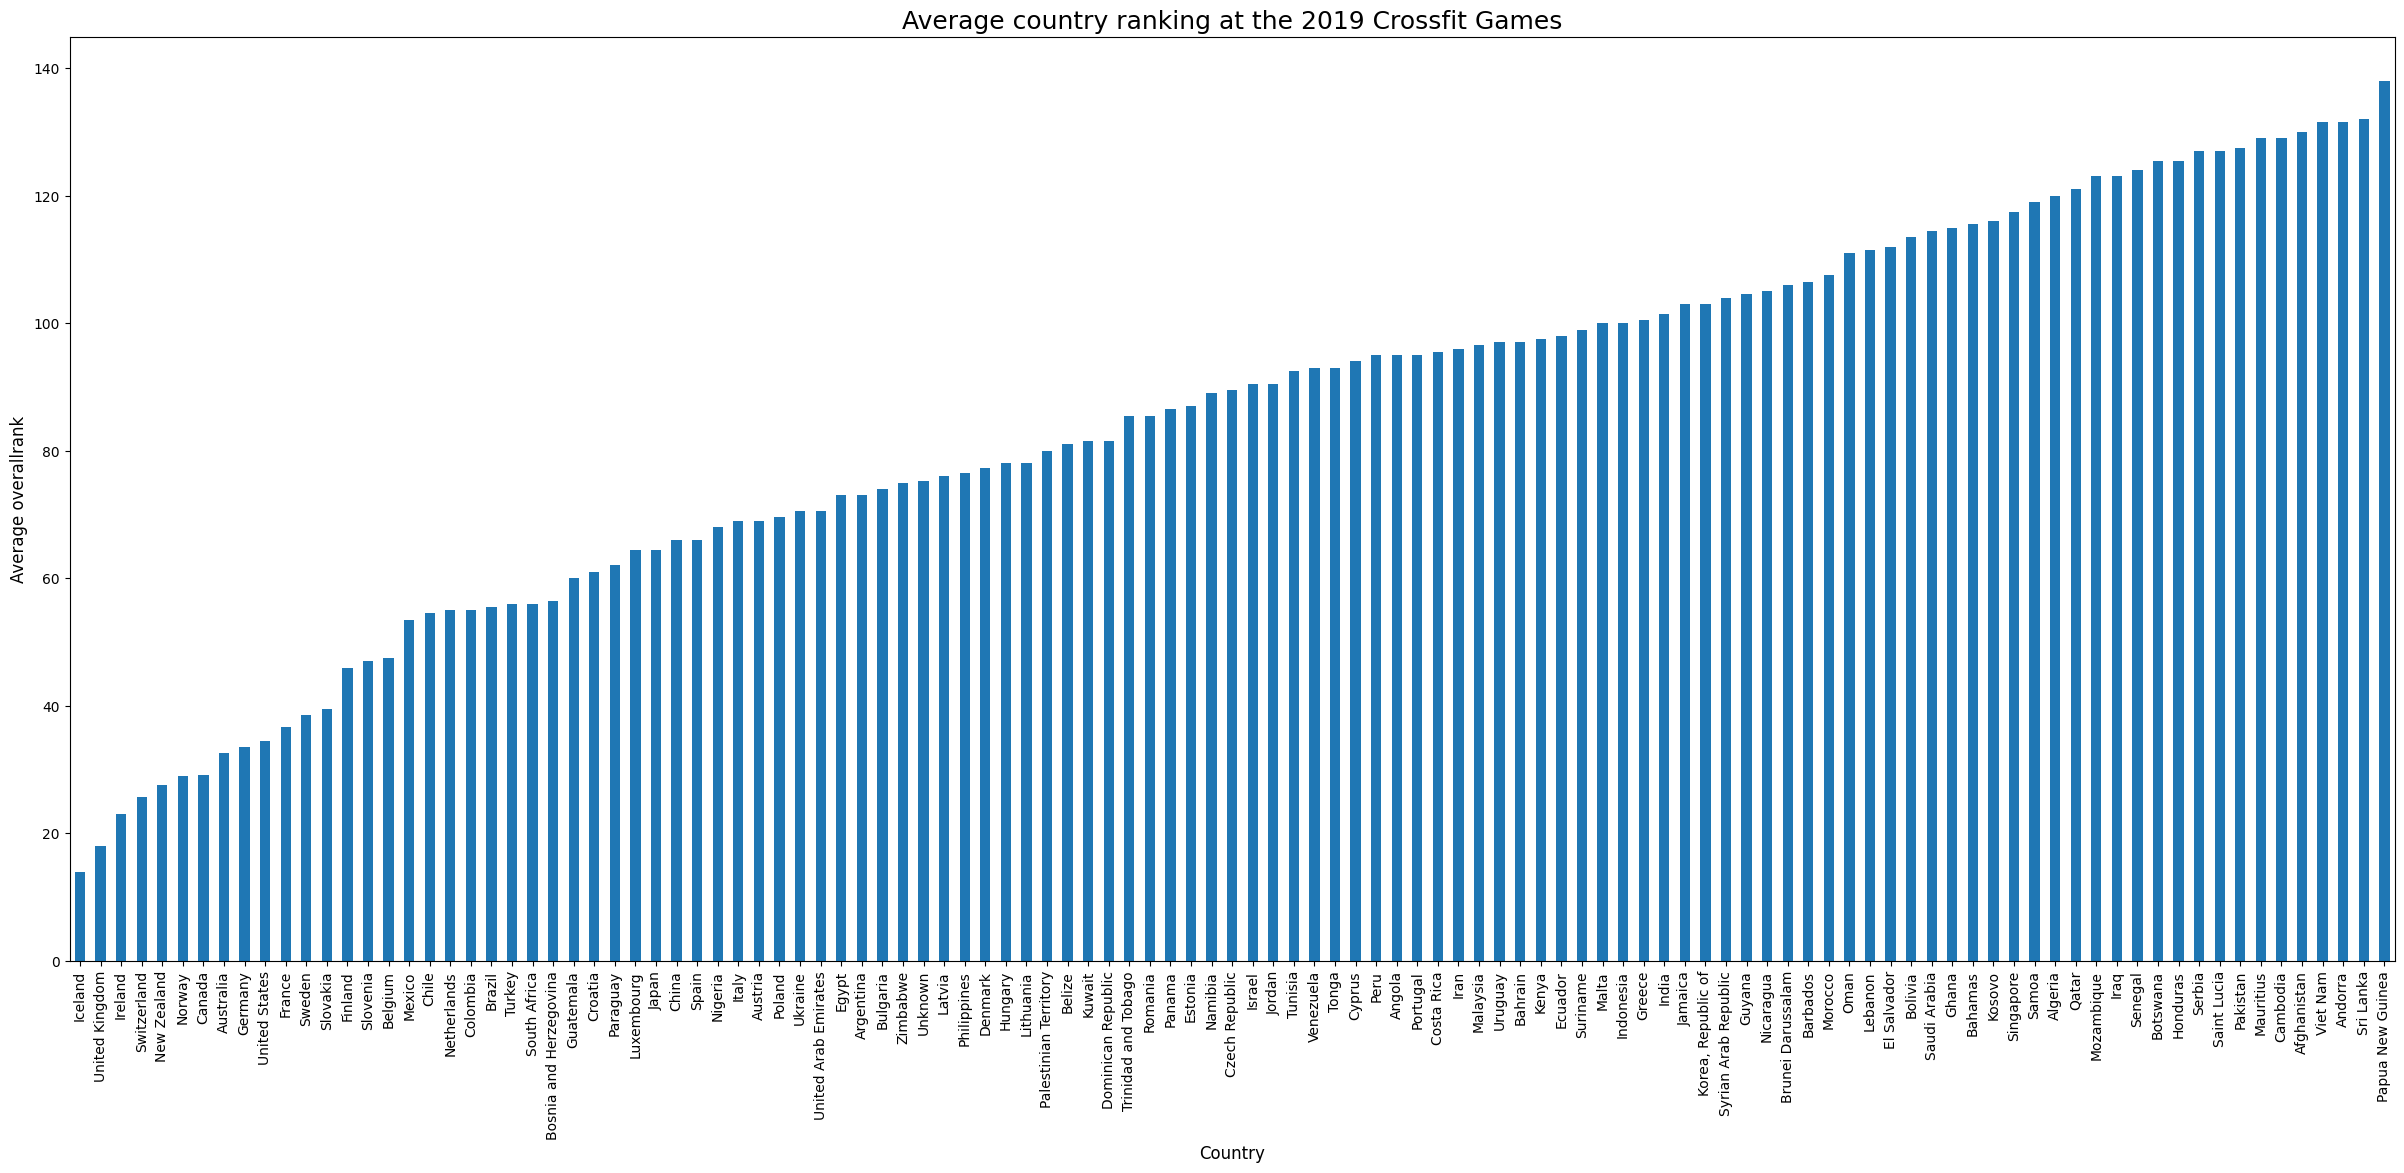

In [16]:
meanCountryRank = merged_2019.groupby('countryOfOriginName')['overallRank'].mean().sort_values()
meanCountryRank.plot.bar(figsize=(30,12))
plt.title('Average country ranking at the 2019 Crossfit Games', fontsize=18)
plt.ylabel('Average overallrank', fontsize=12)
plt.xlabel('Country', fontsize=12)
plt.show()

### What about for all the Games?!

In [17]:
# joining the dataframes together to get competitor info into the events data
merged = events.merge(competitors, how="inner", on=["competitorId","year"])
merged['countryOfOriginCode'] = merged['countryOfOriginCode'].fillna('Unknown')
merged['countryOfOriginName'] = merged['countryOfOriginName'].fillna('Unknown')

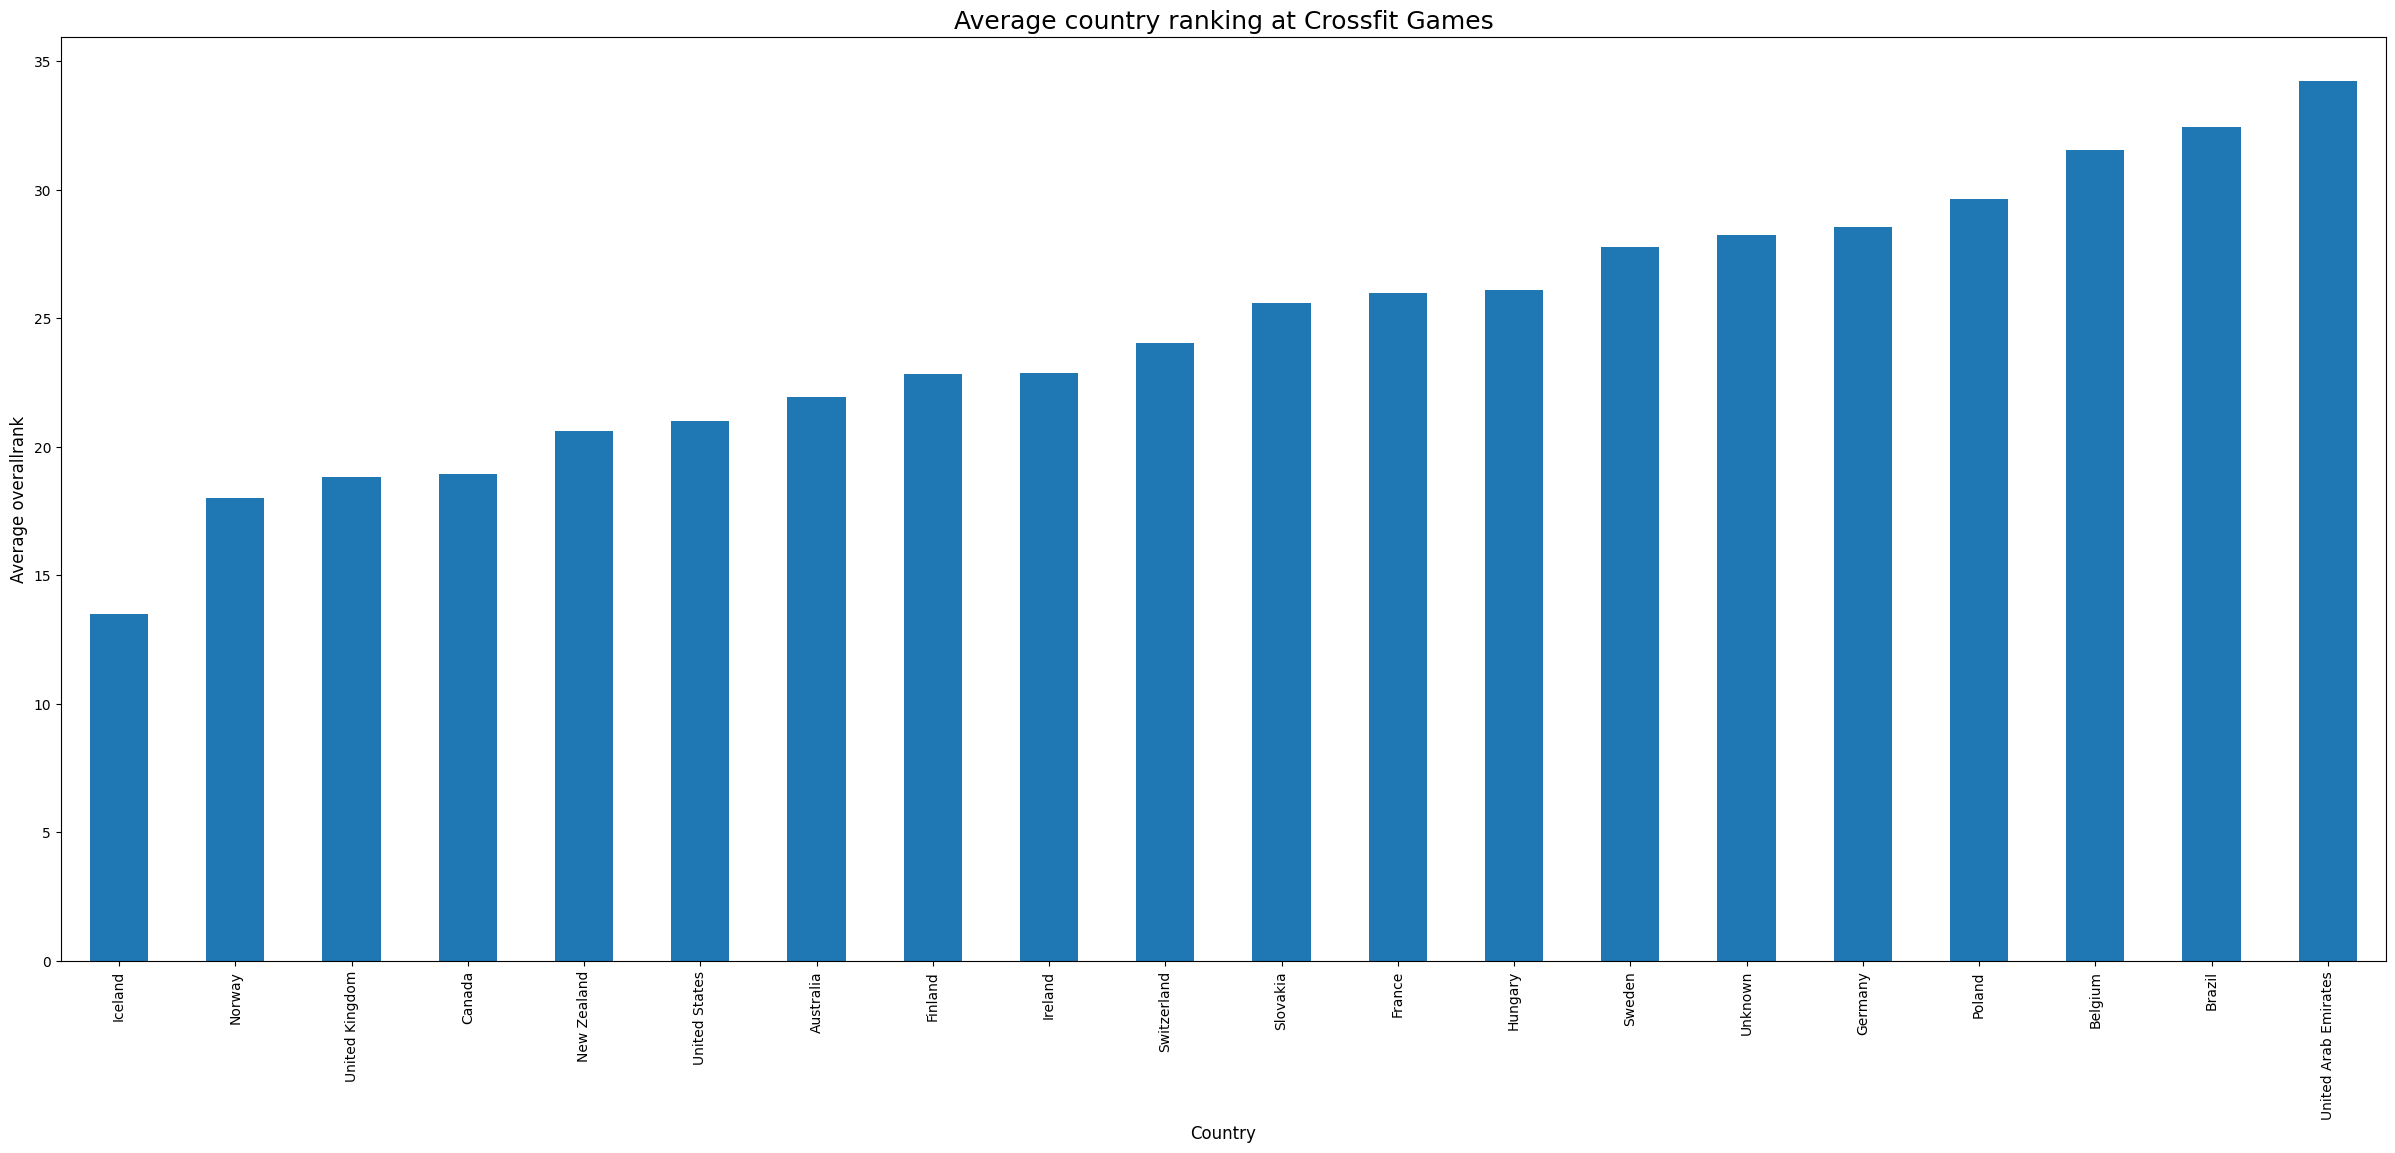

In [18]:
meanCountryRankOverall = merged[merged['overallRank'] != 0]
meanCountryRankOverall = meanCountryRankOverall.groupby('countryOfOriginName')['overallRank'].mean().sort_values().head(20)
meanCountryRankOverall.plot.bar(figsize=(30,12))
plt.title('Average country ranking at Crossfit Games', fontsize=18)
plt.ylabel('Average overallrank', fontsize=12)
plt.xlabel('Country', fontsize=12)
plt.show()

### Let's look at competitors weight

In [19]:
competitors_distinct = competitors.sort_values(by='year', ascending=False).drop_duplicates(subset='competitorId', keep='first')
competitors_distinct.head()

,Unnamed: 0,competitorId,competitorName,firstName,lastName,status,postCompStatus,gender,profilePicS3key,countryOfOriginCode,...,age,height,weight,teamCaptain,overallScore,overallRank,heightInCm,weightInKg,year,divisionName
1791,1791,221169,Victoria Campos,Victoria,Campos,CUT,NaN,F,fb3f1-P221169_1-184.jpg,BR,...,31,161 cm,140 lb,0,14,40,161.0,63.5,2024,Female
1752,1752,163097,Tia-Clair Toomey,Tia-Clair,Toomey,ACT,NaN,F,f1d92-P163097_5-184.jpg,AU,...,30,163 cm,58 kg,0,951,1,163.0,58.0,2024,Female
1734,1734,251546,Alexandre Caron,Alexandre,Caron,ACT,NaN,M,92bcf-P251546_4-184.jpg,CA,...,28,71 in,205 lb,0,445,22,180.3,93.0,2024,Male
1735,1735,2064040,Kalyan Souza,Kalyan,Souza,ACT,NaN,M,853f2-P2064040_2-184.jpg,BR,...,23,184 cm,97 kg,0,422,23,184.0,97.0,2024,Male
1736,1736,153625,Cole Sager,Cole,Sager,ACT,NaN,M,ce316-P153625_5-184.jpg,US,...,33,71 in,200 lb,0,401,24,180.3,90.7,2024,Male


In [20]:
gender_stats = competitors_distinct.groupby('divisionName')['weightInKg'].describe()
print(gender_stats)

              count       mean       std   min    25%   50%   75%    max
divisionName                                                            
Female        369.0  64.845257  6.444157  24.9  61.00  65.0  68.9   88.9
Male          451.0  87.468293  8.449562  32.7  83.25  88.0  93.0  120.2


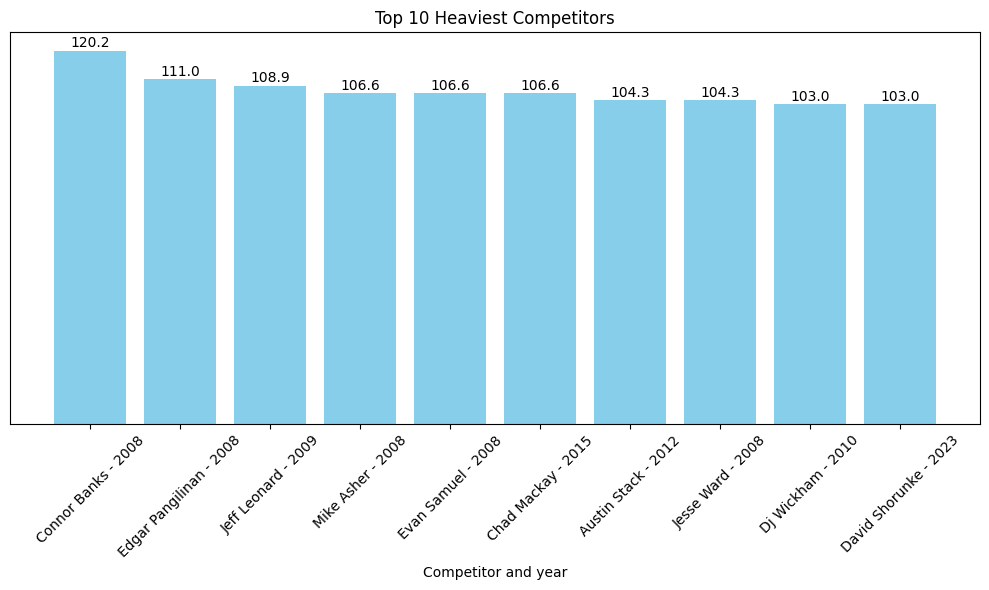

In [21]:
competitors_distinct['competitor_with_year'] = competitors_distinct['competitorName'].astype(str) + ' - ' + competitors_distinct['year'].astype(str)

top_weights = competitors_distinct.sort_values(by='weightInKg', ascending=False).head(10)

# Plotting
plt.figure(figsize=(10, 6))
bars = plt.bar(top_weights['competitor_with_year'], top_weights['weightInKg'], color='skyblue')

# Add data labels
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.2, round(yval, 2), ha='center', va='bottom', fontsize=10)

# Remove y-axis
plt.yticks([])

# Label the axes and title
plt.xlabel('Competitor and year')
plt.title('Top 10 Heaviest Competitors')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

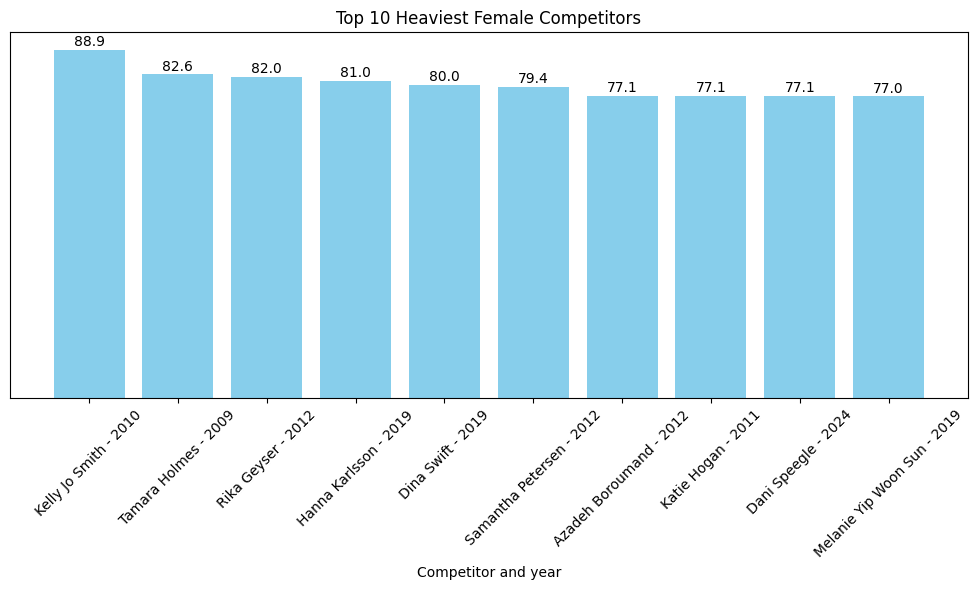

In [22]:
competitors_distinct['competitor_with_year'] = competitors_distinct['competitorName'].astype(str) + ' - ' + competitors_distinct['year'].astype(str)

top_weights_female = competitors_distinct[competitors_distinct['divisionName'] == 'Female'].sort_values(by='weightInKg', ascending=False).head(10)

# Plotting
plt.figure(figsize=(10, 6))
bars = plt.bar(top_weights_female['competitor_with_year'], top_weights_female['weightInKg'], color='skyblue')

# Add data labels
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.2, round(yval, 2), ha='center', va='bottom', fontsize=10)

# Remove y-axis
plt.yticks([])

# Label the axes and title
plt.xlabel('Competitor and year')
plt.title('Top 10 Heaviest Female Competitors')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()
